# Lecture 3: Machine Learning (with Python) Crash Course
CSCI 4360/6360: Data Science II

## Part 1: A Quick Refresher

### Probability

When we say "what is the probability of X", we're discussing a way of quantifying uncertainty.

This uncertainty relates to *one particular event*--in the above statement, that event is "X"--happening out of a *universe of all possible events*.

An easy example is rolling a die: the universe consists of all possible outcomes (any of the 6 sides), whereas any subset is a single event (one side; an even number; etc).

### Relationship with Statistics

Think of "probability" and "statistics" as two sides of the same coin: you cannot have one without the other.

#### Basic Probability Theory

'Data generating process' -- (Probability) --> 'Observed data'
<br>
'Observed Data' -- (Statistical Inference/Data Mining) --> 'Data generating process'

- Probability Theory
    - Given a data generating process, what are the properties of the outcome?
- Statistical Inference
    - Given the outcome, what can we say about the process that generated the data?
    - How can we generalize these observations and make predictions about future outcomes?

![distributions](L3/distributions.png)

These distributions allow us to say something about the *probability* of a random variable taking a certain specific value.

In fact, if you look at the previous plot of the normal bell curves--picking a spot along one of those curves gives you the probability of the random variable representing that distribution *taking that particular value* you picked!

I hope it becomes clear that, the *most likely* value for a random variable to take is its mean (since the curve is highest there). This even has a special name: the **expected value**. It means, on average, this is the value we're going to get from this random variable.

We have a special notation for probability:

$P(X = x)$

$P$ is the universal symbol for "probability of", followed by some *event*. In this case, our event is "$X = x$".

*Random variables* are denoted with uppercase letters (e.g. $X$), and *observations* of that random variable are denoted with lowercase letters (e.g. $x$). So when we say $X = x$, we're asking for the *event* where the random variable $X$ takes on the value of the observation $x$.

### Probabilities

 - Probabilities are *always* between 0 and 1; no exceptions. This means, for any arbitrary event $A$, $0 \le P(A) \le 1$ (super-official notation!).

 - The probability of *something* happening is always exactly 1. Put another way, if you combine all possible events together and ask the probability of one of them occurring, that probability is 1.

 - If $A$ and $B$ are two possible events that disparate (as in, they have no overlap), then the probability of either one of them happening is just the sum of their individual probabilities: $P(A, B) = P(A) + P(B)$.

These three points are referred to as the **Axioms of Probability** and form the foundation for pretty much every other rule of probability that has ever been and will ever be discovered.

### Visualizing Probability

![spinner](L3/spinner1.jpg)

This spinner is split into 12 segments. You could consider the arrow landing on a segment to be one particular "event". So the probability of landing on any one specific segment is $1/12$. The probability of landing on *any segment at all* is 1.

### Dependence and Independence

Two events $A$ and $B$ are **dependent** if having knowledge about *one* of them implicitly gives you knowledge about the other. On the other hand, they're **independent** if knowing one tells you nothing about the other. Take an example of flipping a coin:

I have a penny; a regular old penny. I flip it once, and it lands on *Heads*. I flip it 9 more times, and it lands on *Heads* each time. What is the probability that the next flip will be *Heads*?

If you said $1/2$ (or 50%), you're correct! Coin flips are **independent** events; you could flip the coin 100 times and get 100 heads, and the probability of tails would *still* be $1/2$. Knowing one coin flip or 100 coin flips tells you nothing about future coin flips.

Now, I want to know what the probability is of *two consecutive coin flips* returning Heads. If the first flip is Heads, what is the probability of *both flips being Heads*? What if the first flip is Tails?

In this case, the two coin flips are **dependent**. If the first flip is Tails, then P(two flips = Heads) is 0; it's impossible! On the other hand, if the first coin flip is Heads, then while it's not certain that both coin flips can be Heads, it's still a possibility. Thus, knowing one can tell you something about the other.

If two events $A$ and $B$ are independent, their probability can be written as:

$P(A, B) = P(A) * P(B)$

This is a *huge* simplification that comes up in many data science algorithms: if you can prove two random variables in your data are statistically independent, analyzing their behavior in concert with each other becomes *much* easier.

On the other hand, if two events are dependent (or you simply don't know if they're independent), then we can define the probabilities of these events in terms of their **conditional probabilities**:

$P(A, B) = P(A | B) * P(B)$

This says "the probability of $A$ and $B$ equals the *conditional probability of $A$ given $B$*, multiplied by the probability of $B$."

That vertical bar means "conditioned on", and we'll get to that next!

### Conditional Probability

Conditional probability is way of "fixing" a random variable(s) we don't know, so that we can (in some sense) "solve" for the other random variable(s). So when we say:

$P(A, B) = P(A | B) * P(B)$

This tells us that, for the sake of this computation, we're assuming we *know* what $B$ is in $P(A | B)$, as knowing $B$ gives us additional information in figuring out what $A$ is (again, since $A$ and $B$ are dependent).

### Bayes' Theorem

Bayes' Theorem is a clever rearrangement of conditional probability, which allows you to update conditional probabilities as more information comes in. For two events, $A$ and $B$, Bayes' Theorem states:

$$
P(A | B) = \frac{P(B | A) * P(A)}{P(B)}|
$$

As we've seen, $P(A)$ and $P(B)$ are the probabilities of those two events independent of each other, $P(B | A)$ is the probability of $B$ *given that we know* $A$, and $P(A | B)$ is the probability of $A$ *given that we know* $B$.

### Interpretation of Bayes' Theorem

 - $P(A|B)$ is known as the *posterior* probability, which is the conditional event you're trying to compute.
 - $P(A)$ is known as the *prior* probability, which represents your current knowledge on the event $A$.
 - $P(B|A)$ is known as the *likelihood*, essentially weighting how heavily the prior knowledge you have accumulated factors into the computation of your posterior.
 - $P(B)$ is a normalizing factor--since the variable/event $A$, the thing we're determining, is not involved in this quantity, it is essentially a constant.

Given this interpretation, you could feasibly consider using Bayes' Theorem as a procedure not only to conduct inference on some system, but to simultaneously *update your understanding of the system* by incorporating new knowledge.

## Part 2: Document Classification with Python

We'll end our crash-course with a bit of a review from 3360 or your previous intro-to-ML experience: document classification with **Naive Bayes** and **Logistic Regression**.

### Bag of words

Hopefully you're familiar with this abstraction for modeling documents.

This model assumes that each word in a document is drawn independently from a multinomial distribution over possible words (a multinomial distribution is a generalization of a Bernoulli distribution to multiple values). Although this model ignores the ordering of words in a document, it works surprisingly well for a number of tasks, including classification.

In short, it says: word *order* doesn't matter nearly as much--or perhaps, at all--as word *frequency*.

![bow](L3/bag-of-words.jpg)

### Naive Bayes

With any (discriminative) classification problem, you're asking: what's the probability of a label given the data? In our document classification example, this question is: what is the probability of the document class, given the document itself?

Formally, for a document $x$ and label $y$: $P(y | x)$

If we're using individual word counts as features ($x_1$ is word 1, $x_2$ is word 2, and so on), then by the rules of conditional probability, this probability would expand into something like this:

$$
P(y | x_1, x_2, ..., x_n) = \frac{P(y)P(x_1, x_2, ..., x_n)}{P(x_1, x_2, ..., x_n)}
$$

This is, for all practical purposes, intractable. Hence, "naive": we make each word conditionally independent of the others, *given* the label:

$$
P(x_i | y, x_1, x_2, ..., x_i, x_{i + 1}, ..., x_n) = P(x_i | y)
$$

For any given word $x_i$ then, the original problem reduces to:

$$
P(y | x_1, x_2, ..., x_n) = \frac{P(y) \Pi_{i = 1}^n P(x_i | y)}{P(x_1, x_2, ..., x_n)}
$$

And since the denominator is the same across all documents, we can effectively ignore it as a constant, thereby giving us a decision:

$$
\hat{y} = \textrm{argmax}_y P(y) \Pi_{i = 1}^n P(x_i | y)
$$

If you really want to dig into what makes Naive Bayes an improvement over the "optimal Bayes classifier", you can count exactly how many *parameters* are required in either case.

We'll take the simple example: the decision variable $Y$ is boolean, and the observations $X$ have $n$ attributes, each of which is also boolean. Formally, that looks like this:

$$
\theta_{ij} = P(X = x_i | Y = y_i)
$$

where $i$ takes on $2^n$ possible values (one for each of the possible combinations of boolean values in the array $X$, and $j$ takes on 2 possible values (true or false). For any fixed $j$ the sum over $i$ of $\theta_{ij}$ has to be 1 (probability). So for any particular $y_j$, you have the $2^{n}$ values of $x_i$, so you need $2^n - 1$ parameters. Given two possible values for $j$ (since $Y$ is boolean!), we must estimate a total of $2 (2^n - 1)$ such $\theta_{ij}$ parameters.

**This is a problem!** 

This means that, if our observations $X$ have three attributes--3-dimensional data--we need 14 distinct data points *at least*, one for each possible boolean combination of attributes in $X$ and label $Y$. It gets exponentially worse as the number of boolean attributes increases--if $X$ has 30 boolean attributes, we'll have to estimate **30 billion parameters.**

This is why the conditional independence assumption of Naive Bayes is so critical: more than anything, it **substantially** reduces the number of required estimated parameters. If, through conditional independence, we have

$$
P(X_1, X_2, ..., X_n | Y) = \Pi_{i = 1}^n P(X_i | Y)
$$

or, to illustrate more concretely, observations $X$ with 3 attributes each

$$
P(X_1, X_2, X_3 | Y) = P(X_1 | Y) P(X_2 | Y) P(X_3 | Y)
$$

we've just gone from requiring the aforementioned 14 parameters, to 6!

**Formally: we've gone from requiring $2(2^n - 1)$ parameters to $2n$.**

Naive Bayes is a fantastic algorithm and works well in practice. However, it has some important drawbacks to be aware of:

 - **Data may not be conditionally independent.** The easiest example of this: replicating a single observation multiple times. These are *clearly* dependent entities, but Naive Bayes will treat them as independent of each other, given the class label. In practice this isn't a common occurrence but can happen.

 - **What about continuous attributes?** We've only looked so far at data with boolean attributes; most data, including documents, are not boolean. Rather, they are *continuous*. We can fairly easily modify Naive Bayes to *Gaussian Naive Bayes,* where each attribute is an i.i.d. Gaussian, but this introduces new problems: now we're assuming our data are Gaussian, which like conditional independence, may not be true in practice.

 - **Observing data in *testing* that was not observed in *training*.** With the document classification example, training the Naive Bayes parameters essentially consists of word counting. However, what happens when you encounter a word $X_i$ in a test set for which you do not have a corresponding $P(X_i | Y)$? By default, this sets a probability of 0, but this is problematic in a Naive Bayes setting: since you're computing $P(X_1 | Y) P(X_2 | Y) ... P(X_n | Y)$ for a document, a single probability of 0 in that string of multiplication nukes the entire statement!

### Logistic Regression

Logistic regression is a bit different. Rather than estimating the parametric form of the data $P(x_i | y)$ and $P(y)$ in order to get to the posterior $P(y | x)$, here we're learning the decision boundary $P(y | x)$ *directly*.

Ideally we want some kind of output function between 0 and 1--so let's just go with the *logit*

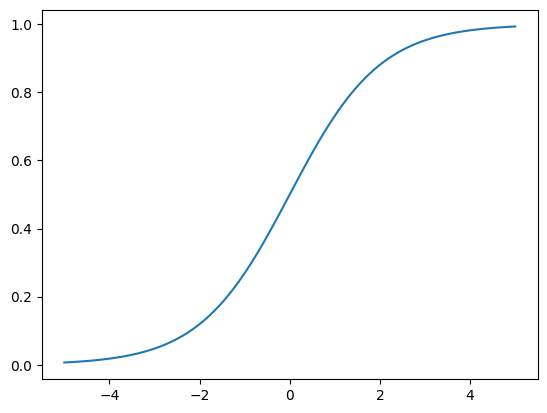

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5, 5, 100)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)

We just adapt the logit function to work our document features $x_i$, and some weights $w_i$:

$$
P(Y = 0 | X) = \frac{1}{1 + \textrm{exp}(w_0 + \sum_i w_i X_i)}
$$

Then finding $P(Y = 1 | X)$ is just $1 - P(Y = 0 | X)$, or

$$
P(Y = 1 | X) = \frac{\textrm{exp}(w_0 + \sum_i w_i X_i)}{1 + \textrm{exp}(w_0 + \sum_i w_i X_i)}
$$

This second equation, for $P(Y = 1 | X)$, arises directly from the fact that these two terms must sum to 1. Write it out yourself if you need convincing!

So how do we train a logistic regression model? Here's where things get a tiny bit trickier than Naive Bayes.

In Naive Bayes, the bag-of-words model was 90% of the classifier. Sure, we needed some marginal probabilities and priors, but the word counting was easily the bulk of it.

Here, the word counting is still important, but now we have this entire array of *weights* we didn't have before. These weights correspond to feature relevance--how important the features are to prediction. In Naive Bayes we just kind of assumed that was implicit in the count of the words--higher counts, more relevance. But logistic regression separates these concepts, meaning we now have to learn the weights *on our own*.

We have our training data: $\{(X^{(j)}, y^{(j)})\}_{j = 1}^n$, and each $X^{(j)} = (x^{(j)}_1, ..., x^{(j)}_d)$ for $d$ features/dimensions/words.

And we want to learn: $\hat{\textbf{w}} = \textrm{argmax}_{\textbf{w}} \Pi_{j = 1}^n P(y^{(j)} | X^{(j)}, \textbf{w})$

Our conditional log likelihood then takes the form: $l(\textbf{w}) = \textrm{ln} \Pi_j P(y^j | \vec{x}^j, \textbf{w})$

$$
 = \sum_j \left[ y^j (w_0 + \sum_i^d w_i x_i^j) - \textrm{ln}(1 - \textrm{exp}(w_0 + \sum_i^d w_i x_i^j)) \right]
$$

How did we get here?

**First**, note that the likelihood function is typically formally denoted as

$$
W \leftarrow \textrm{arg max}_W \Pi_l P(Y^l | X^l, W)
$$

for each training example $X^l$ with corresponding ground-truth label $Y^l$ (they are multipled together because we assume each observation is *independent* of the other). We include the weights $W$ in this expression because the probability is absolutely a function of the weights, and we want to pick the combination of weights $W$ that make the probability expression *as large as possible*.

**Second**, because we're both pragmatic enough to use a short-cut whenever we can and evil enough to know it'll confuse other people, we never actually work directly with the likelihood as stated above. Instead, we work with the *log*-likelihood, by literally taking the log of the function:

$$
W \leftarrow \textrm{arg max}_W \sum_l \textrm{ln} P(Y^l | X^l, W)
$$

Recall that the log of a product is equivalent to the sum of logs.

**Third**, the probability statement $P(Y^l | X^l, W)$ has two main terms, since $Y$ can be either 1 or 0; we want to pick the one with the largest probability. So we expand that term into the following:

$$
l(W) = \sum_l Y^l \textrm{ln} P(Y^l = 1|X^l, W) + (1 - Y^l) \textrm{ln} P(Y^l = 0 | X^l, W)
$$

where $l(W)$ is our log-likehood function.

Hopefully this looks somewhat familiar to you: it's a lot like finding the expected value $E[X]$ of a discrete random variable $X$, where you take each possible value $X = x$ and multiply it by its probability $P(X = x)$, summing them all together. You can see the case $Y = 1$ on the left, and $Y = 0$ on the right, both being multiplied by their corresponding conditional probabilities.

Hopefully you'll *also* note: since you're using this equation for training, $Y^l$ will take ONLY 1 or 0, therefore zero-ing out one side of the equation or the other for every single training instance. So that's kinda nice?

**Fourth**, get ready for some math! If we have

$$
l(W) = \sum_l Y^l \textrm{ln} P(Y^l = 1|X^l, W) + (1 - Y^l) \textrm{ln} P(Y^l = 0 | X^l, W)
$$

Expand the last term:

$$
l(W) = \sum_l Y^l \textrm{ln} P(Y^l = 1|X^l, W) + \textrm{ln} P(Y^l = 0 | X^l, W) - Y^l \textrm{ln} P(Y^l = 0|X^l, W)
$$

Combine terms with the same $Y^l$ coefficient (first and third terms):

$$
l(W) = \sum_l Y^l \left[ \textrm{ln} P(Y^l = 1|X^l, W) - \textrm{ln} P(Y^l = 0|X^l, W) \right] + \textrm{ln} P(Y^l = 0 | X^l, W)
$$

Recall properties of logarithms--when subtracting two logs with the same base, you can combine their arguments into a single log dividing the two:

$$
l(W) = \sum_l Y^l \left[ \textrm{ln} \frac{P(Y^l = 1|X^l, W)}{P(Y^l = 0|X^l, W)} \right] + \textrm{ln} P(Y^l = 0 | X^l, W)
$$

Now things get interesting--remember earlier where we defined exact parametric forms of $P(Y = 1 | X)$ and $P(Y = 0|X)$? Substitute those back in, and you'll get:

$$
l(W) = \sum_l \left[ Y^l (w_0 + \sum_i^d w_i X_i^l) - \textrm{ln}(1 - \textrm{exp}(w_0 + \sum_i^d w_i X_i^l)) \right]
$$

which is exactly the equation we had before we started going through these proofs.

**Good news!** $l(\textbf{w})$ is a concave function of $\textbf{w}$, meaning no pesky local optima.

**Bad news!** No closed-form version of $l(\textbf{w})$ to find explicit values (feel free to try and take its derivative, set it to 0, and solve; it's a transcendental function, so it has no closed-form solution).

**Good news!** Concave (convex) functions are easy to optimize!

Maximum of a concave function = minimum of a convex function

 - Gradient ascent (concave) = gradient descent (convex)
 
Gradient: $\nabla_{\textbf{w}} l(\textbf{w}) = \left[ \frac{\partial l(\textbf{w})}{\partial w_0}, ..., \frac{\partial l(\textbf{w})}{\partial w_n} \right] $

Update rule: $w_i^{(t + 1)} = w_i^{(t)} + \eta \frac{\partial l(\textbf{w})}{\partial w_i}$

Which ultimately leads us to **gradient ascent for logistic regression**.


#### Gradient ascent algorithm: iterate until change < ε

$$
w_0^{(t+1)} \leftarrow w_0^{(t)} + \eta \sum_j \bigl[y^j - \hat{P}(Y^j = 1 \mid x^j, \mathbf{w}^{(t)})\bigr]
$$

For i = 1, ..., d,

$$
w_i^{(t+1)} \leftarrow w_i^{(t)} + \eta \sum_j x_i^j \bigl[y^j - \hat{P}(Y^j = 1 \mid x^j, \mathbf{w}^{(t)})\bigr]
$$

repeat
 <br>
 <br>
> $ (\hat{P}(Y^j = 1 \mid x^j, \mathbf{w}^{(t)})) $ --> **Predict what current weight thinks label Y should be**

**This is Assignment 1!**

In addition to going over some basic concepts in probability, Naive Bayes, and Logistic Regression, you'll also implement some document classification code from scratch (don't let me catch anyone using scikit-learn, mmk).

The hardest part in the coding will be implementing gradient descent! It's not a lot of code--**especially if you use NumPy vectorized programming**--but it will take some sitting-and-thinking-and-whiteboarding time (unless you know this stuff cold already, I suppose)!

There is also some theory and small proofs.

**Don't be intimidated.** I purposely made this homework tricky both to get an idea of your level of understanding of the topics so I can gauge how to proceed in the course, and also so you have an idea where your weaknesses are.

**ASK ME FOR HELP!** Helping students is *literally* my day job. Don't be shy; if you're stuck, reach out for help, both from me AND your student colleagues!

## Administrivia

 - **Homework 1 was released last Thursday!** This is a warm-up to familiarize you with Python, AutoLab, and to make sure you're up to speed on the basics of machine learning and probability. You'll be implementing Multinomial Naive Bayes and Logistic Regression *from first principles*. Should be fun! Assignment 1 is due in 2 weeks.

 - **AutoLab registration.** Still paused, unfortunately. We're rebuilding the AutoLab VM from scratch. I'll hopefully have it done this week, at which point I can open up registrations and you can start making practice submissions of HW1 ahead of its final deadline in 2 weeks.

 - The first Workshop is *tomorrow!*. If you have not yet signed up for workshops, please do so here: https://docs.google.com/spreadsheets/d/1S9fuFx47iEiB5z0grZURiRu7aBYdiB3bGUPmob25zyw/edit#gid=0 (Just FYI: after today, I will *auto-assign* anyone who has not yet signed up).

## References

 - https://gilscvblog.com/2013/08/23/bag-of-words-models-for-visual-categorization/
 - Grus, Joel. *Data Science from Scratch*. 2015. ISBN-13: 978-1491901427
 - Grinstead, Charles and Snell, J. Laurie. *Introduction to Probability*. [PDF](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/amsbook.mac.pdf)
 - Illowsky, Barbara and Dean, Susan. *Introductory Statistics*. [link](https://openstax.org/details/introductory-statistics)
 - Diez, David; Barr, Christopher; Cetinkaya-Rundel, Mine; *OpenIntro Statistics*. [link](https://www.openintro.org/stat/textbook.php?stat_book=os)
 - Wasserman, Larry. *All of Statistics: A Concise Course in Statistical Inference*. 2010. ISBN-13: 978-1441923226